In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

## Read the data

In [3]:
wine_data = load_wine()

wine_df = pd.DataFrame(
    data=wine_data.data,
    columns=wine_data.feature_names
)

wine_df['target'] = wine_data.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


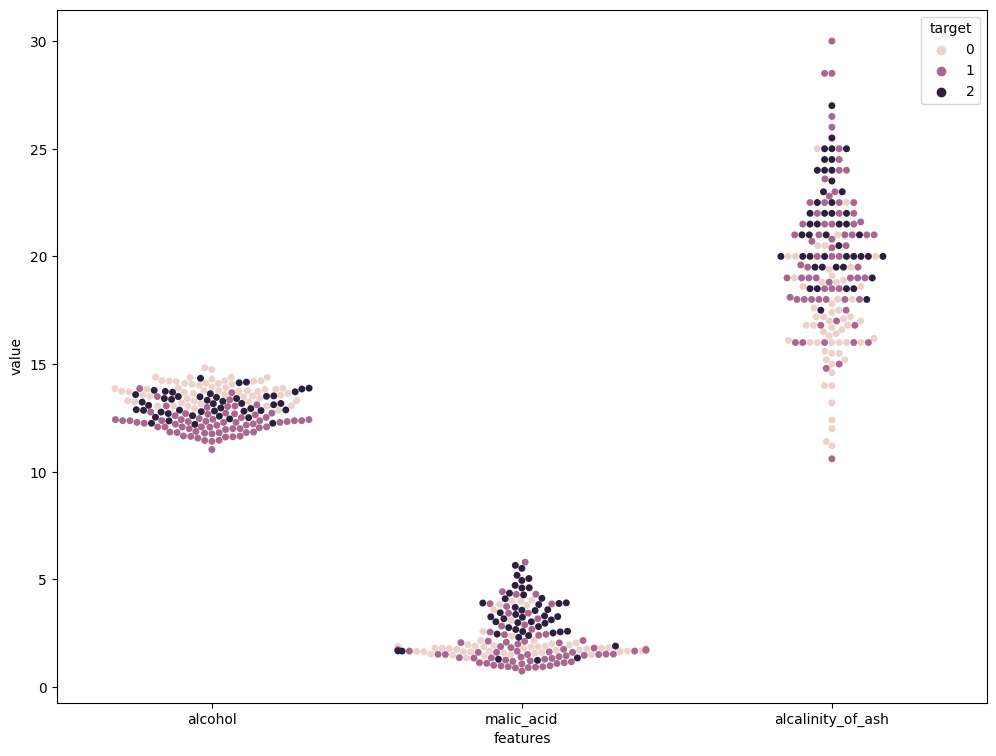

In [4]:
from seaborn import swarmplot

data_to_plot = pd.melt(wine_df[['alcohol', 'malic_acid', 'alcalinity_of_ash', 'target']],
                       id_vars='target',
                       var_name='features',
                       value_name='value')

swarmplot(data=data_to_plot, x='features', y='value', hue='target');

### Features Count

In [5]:
wine_df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

### Features Bar Chart

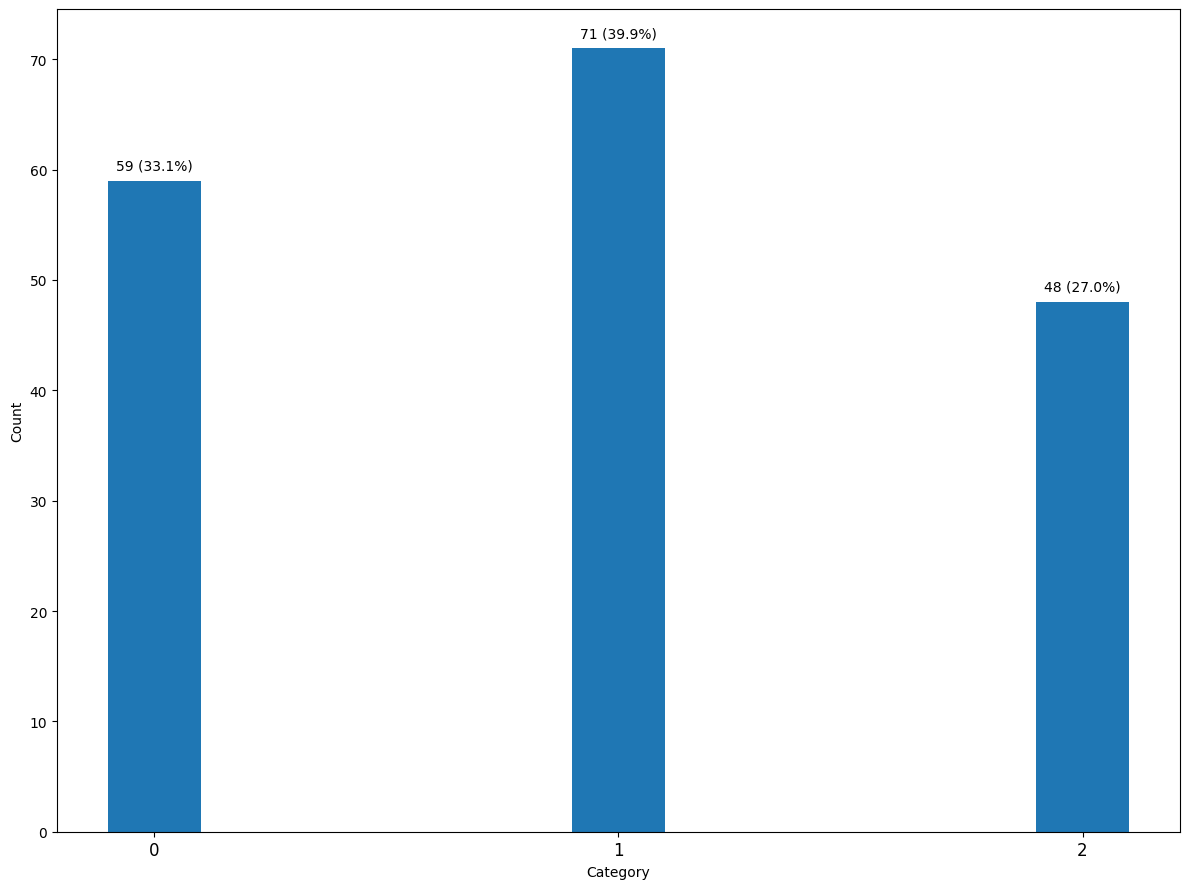

In [8]:
fig, ax = plt.subplots()

x = [0, 1, 2]
y = [59, 71, 48]

total = sum(y)
percentage = [val / total * 100 for val in y]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticks([0,1,2])
ax.set_xticklabels([0,1,2], fontsize=12)

for index, value in enumerate(y):
    plt.text(x=int(index), y=value + 1, s=f'{value} ({percentage[index]:.1f}%)', ha='center')
    
plt.tight_layout()

### Train/test split

In [9]:
from sklearn.model_selection import train_test_split

# Assuming the last column is the target column
X = wine_df.iloc[:, :-1]
y = wine_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


<hr>